In [1009]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [1010]:
salarios = pd.read_csv(r"Arquivo_Salarios_Colaboradores_2021.csv", sep=";")
salarios.head()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,1,8000.80,25,4,11,1,1,1,0,79.38
1,2,8500.17,24,5,11,0,0,1,0,84.13
2,3,3350.59,22,1,12,0,0,0,0,46.15
3,4,9500.24,28,4,14,1,0,0,1,83.85
4,5,1500.63,18,2,12,0,0,0,1,73.64


In [1011]:
salarios.tail()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
175,176,7896.70,36,14,13,0,1,1,1,88.87
176,177,10575.13,26,15,14,1,0,1,1,85.45
177,178,6309.66,36,3,14,1,0,0,1,76.72
178,179,2100.68,28,11,12,0,1,0,1,76.22
179,180,4059.13,21,3,15,1,1,0,1,79.40


In [1012]:
#salarios.loc[salarios["Ordem"][179]]

salarios.loc[salarios["Ordem"]==120]


,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
119,120,4404.48,23,7,11,0,0,0,0,87.07


In [1013]:
salarios.shape

(180, 10)

In [1014]:
# análise inicial dos dados
salarios.describe().round(2)

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.0,180.00
mean,90.50,8539.49,31.07,9.07,12.58,1.27,0.28,0.55,0.5,71.74
std,52.11,4729.51,9.35,5.61,2.57,1.22,0.45,0.50,0.5,15.99
min,1.00,1500.63,18.00,1.00,7.00,0.00,0.00,0.00,0.0,34.48
25%,45.75,5491.23,24.00,5.00,11.00,1.00,0.00,0.00,0.0,60.41
50%,90.50,7551.12,28.00,7.00,13.00,1.00,0.00,1.00,0.5,72.08
75%,135.25,10584.68,36.00,13.00,14.00,1.00,1.00,1.00,1.0,83.85
max,180.00,25329.91,65.00,25.00,19.00,7.00,1.00,1.00,1.0,98.96


In [1015]:
salarios.salario.describe

<bound method NDFrame.describe of 0       8000.80
1       8500.17
2       3350.59
3       9500.24
4       1500.63
         ...   
175     7896.70
176    10575.13
177     6309.66
178     2100.68
179     4059.13
Name: salario, Length: 180, dtype: float64>

In [1016]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ordem         180 non-null    int64  
 1   salario       180 non-null    float64
 2   idade         180 non-null    int64  
 3   tempocasa     180 non-null    int64  
 4   escolar       180 non-null    int64  
 5   qproj_estra   180 non-null    int64  
 6   proj_sustent  180 non-null    int64  
 7   proj_6sigma   180 non-null    int64  
 8   proj_social   180 non-null    int64  
 9   notaavalia    180 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 14.2 KB


In [1017]:
salarios.salario.tail()

175     7896.70
176    10575.13
177     6309.66
178     2100.68
179     4059.13
Name: salario, dtype: float64

In [1018]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(salarios.isnull().sum(),
            salarios.isnull().sum()/len(salarios)), 
            columns=['Count', 'Proportion'], 
            index=salarios.columns)

,Count,Proportion
Ordem,0,0.0
salario,0,0.0
idade,0,0.0
tempocasa,0,0.0
escolar,0,0.0
qproj_estra,0,0.0
proj_sustent,0,0.0
proj_6sigma,0,0.0
proj_social,0,0.0
notaavalia,0,0.0


In [1019]:
salarios.nunique()

Ordem           180
salario         179
idade            37
tempocasa        24
escolar          13
qproj_estra       8
proj_sustent      2
proj_6sigma       2
proj_social       2
notaavalia      141
dtype: int64

In [1020]:
# avaliando a variável quantidade de projetos
salarios[salarios.qproj_estra > 1]

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
13,14,16284.13,47,7,14,2,0,1,1,66.15
14,15,18120.84,65,9,14,2,0,1,1,76.56
17,18,13063.14,35,10,13,2,0,1,0,76.77
18,19,13844.19,54,15,11,4,0,1,1,61.98
19,20,14232.19,44,8,13,4,0,1,1,67.92
32,33,14500.65,24,6,16,2,0,1,1,84.13
40,41,9750.49,28,4,12,2,0,1,1,85.10
41,42,9750.51,28,6,12,2,0,1,1,75.10
42,43,8000.36,27,4,12,3,0,1,1,70.10
43,44,8100.44,27,6,12,3,0,1,1,70.10


In [1021]:
salarios.drop("Ordem", axis=1, inplace=True)

In [1022]:
salarios.head()

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,8000.80,25,4,11,1,1,1,0,79.38
1,8500.17,24,5,11,0,0,1,0,84.13
2,3350.59,22,1,12,0,0,0,0,46.15
3,9500.24,28,4,14,1,0,0,1,83.85
4,1500.63,18,2,12,0,0,0,1,73.64


In [1023]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salario       180 non-null    float64
 1   idade         180 non-null    int64  
 2   tempocasa     180 non-null    int64  
 3   escolar       180 non-null    int64  
 4   qproj_estra   180 non-null    int64  
 5   proj_sustent  180 non-null    int64  
 6   proj_6sigma   180 non-null    int64  
 7   proj_social   180 non-null    int64  
 8   notaavalia    180 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 12.8 KB


Após análise inicial dos dados, verificamos que as informações estão de acordo para dar prosseguimento na criação do modelo.
Avaliamos dados missing, tipos de dados e se havia algum valor não condizente em alguma coluna.
Agora vamos continuar a análise com alguns gráficos para avaliar distribuição e outliers.

Text(0.5, 1.0, 'Histograma Salarios')

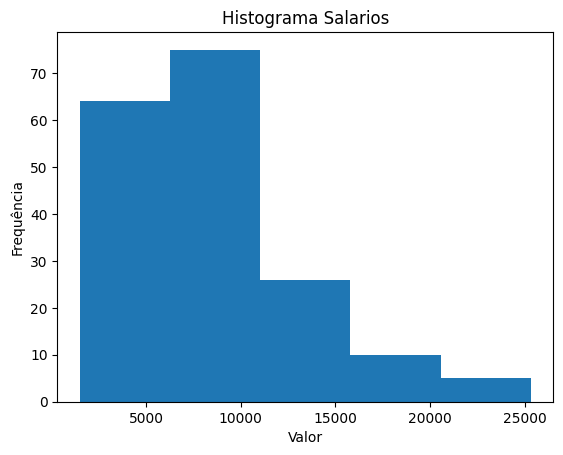

In [1024]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(salarios['salario'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Salarios')

Text(0, 0.5, 'Ocorrência')

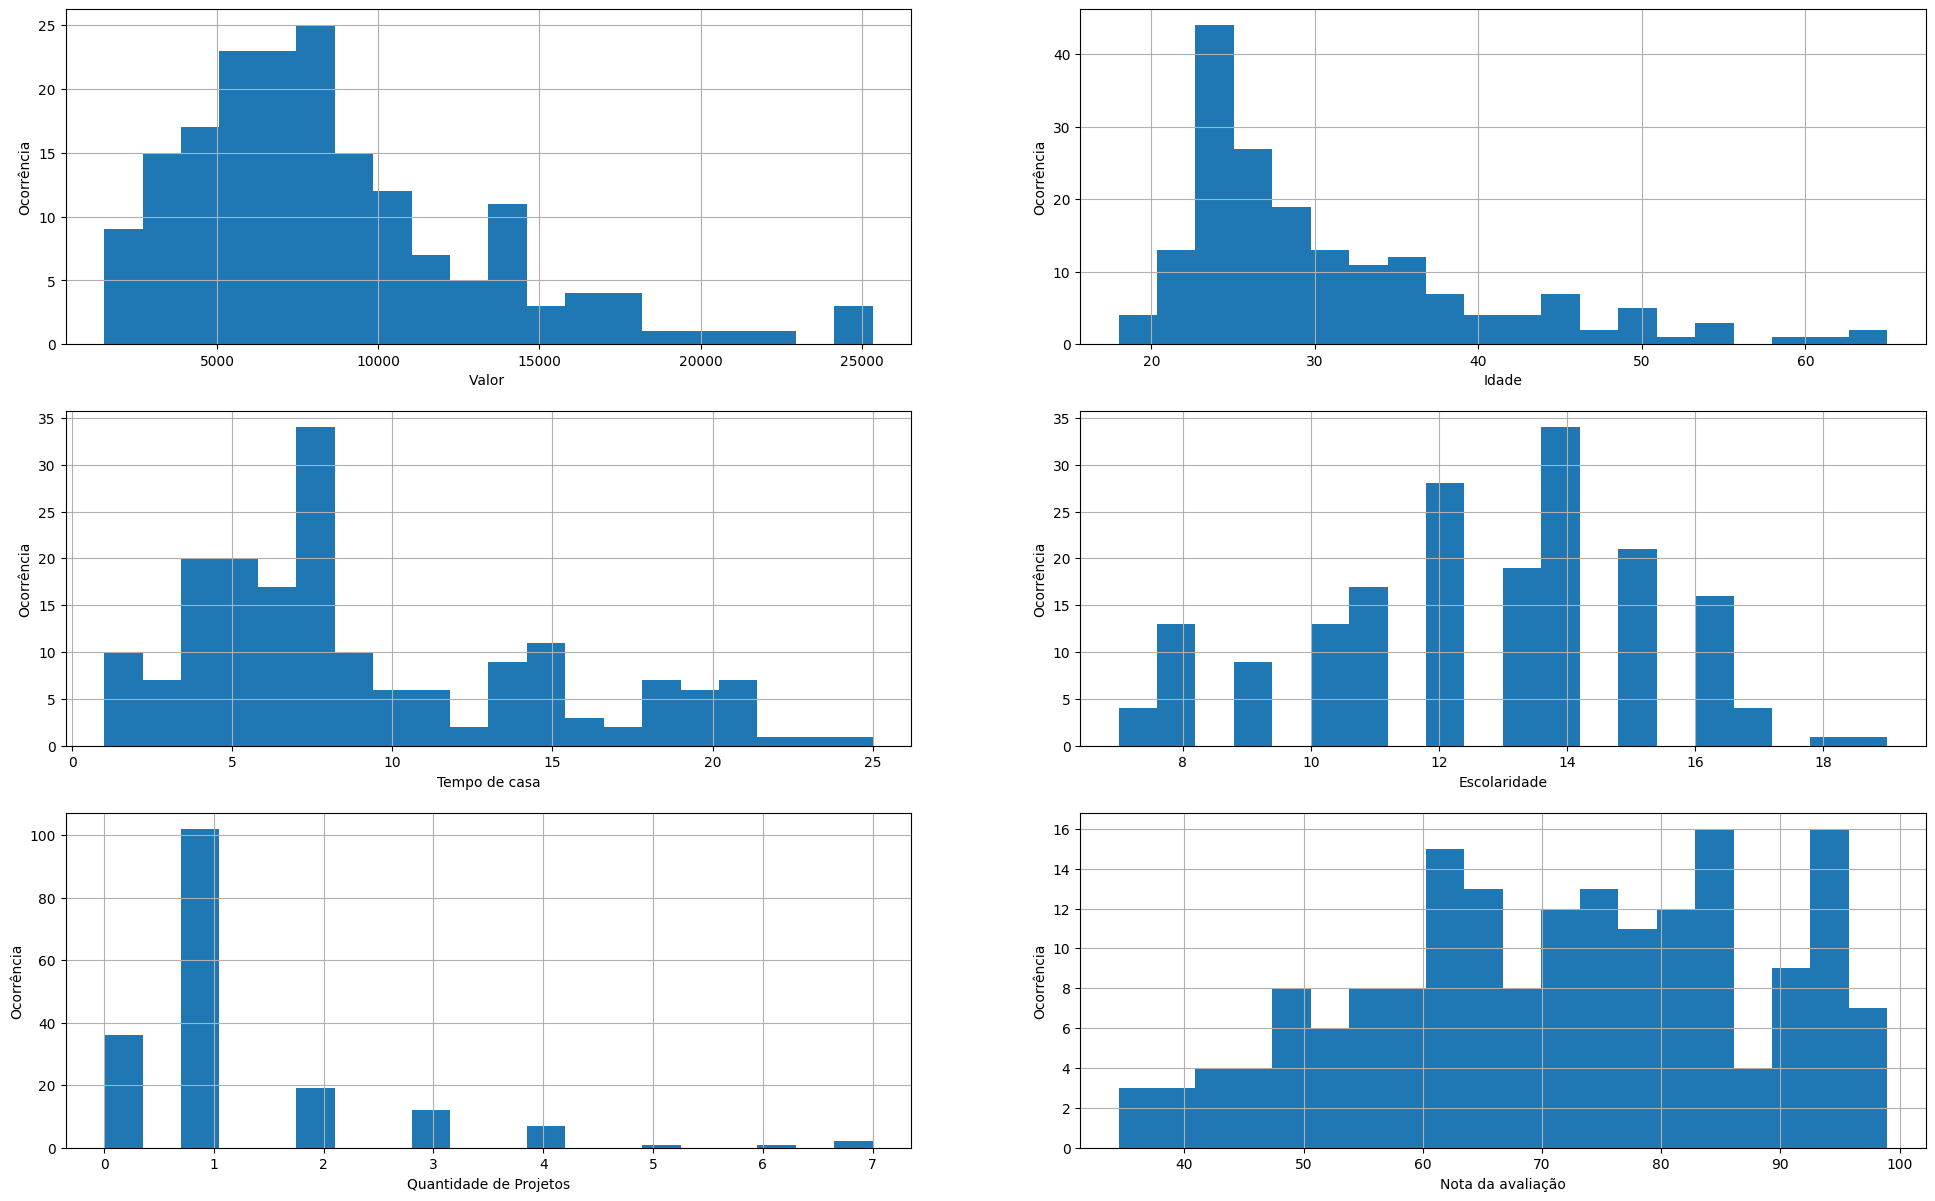

In [1025]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = salarios.salario.hist(bins=20)
fig.set_xlabel('Valor ')
fig.set_ylabel('Ocorrência')

plt.subplot(4, 2, 2)
fig = salarios.idade.hist(bins=20)
fig.set_xlabel('Idade')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 3)
fig = salarios.tempocasa.hist(bins=20)
fig.set_xlabel('Tempo de casa')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 4)
fig = salarios.escolar.hist(bins=20)
fig.set_xlabel('Escolaridade')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 5)
fig = salarios.qproj_estra.hist(bins=20)
fig.set_xlabel('Quantidade de Projetos')
fig.set_ylabel('Ocorrência')

plt.subplot(4, 2, 6)
fig = salarios.notaavalia.hist(bins=20)
fig.set_xlabel('Nota da avaliação')
fig.set_ylabel('Ocorrência')


Text(0, 0.5, 'Nota da avaliação')

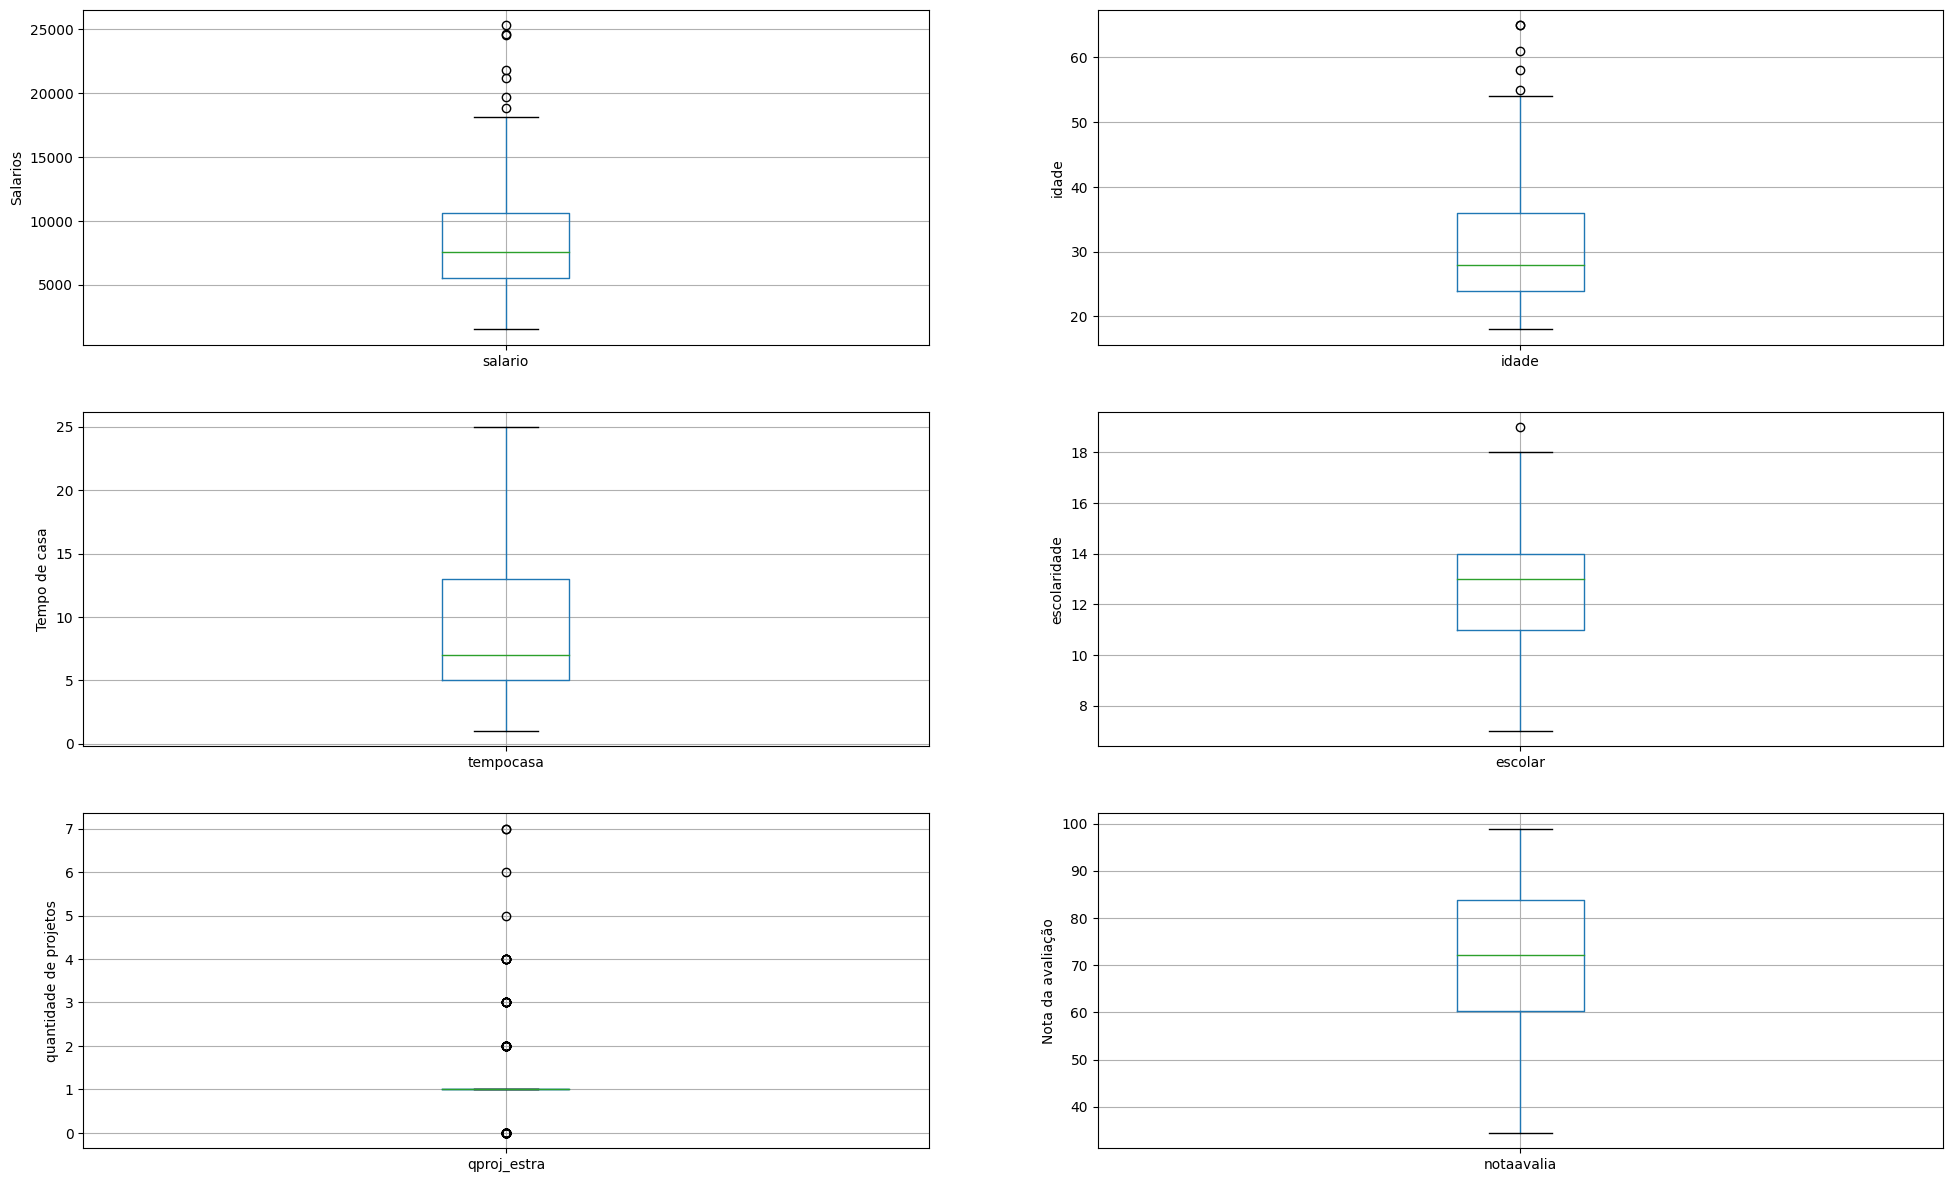

In [1026]:
# Outra opção para variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = salarios.boxplot(column='salario', )
fig.set_title('')
fig.set_ylabel('Salarios')


plt.subplot(4, 2, 2)
fig = salarios.boxplot(column='idade')
fig.set_title('')
fig.set_ylabel('idade')


plt.subplot(4, 2, 3)
fig = salarios.boxplot(column='tempocasa')
fig.set_title('')
fig.set_ylabel('Tempo de casa')

plt.subplot(4, 2, 4)
fig = salarios.boxplot(column='escolar')
fig.set_title('')
fig.set_ylabel('escolaridade')

plt.subplot(4, 2, 5)
fig = salarios.boxplot(column='qproj_estra')
fig.set_title('')
fig.set_ylabel('quantidade de projetos')

plt.subplot(4, 2, 6)
fig = salarios.boxplot(column='notaavalia')
fig.set_title('')
fig.set_ylabel('Nota da avaliação')

In [1027]:
# avaliando os outliers de salario
salarios[salarios.salario > 20000]

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
108,24660.55,58,20,17,6,0,1,1,98.96
109,21192.16,61,12,16,7,0,1,1,82.86
161,25329.91,51,21,17,2,0,1,0,63.03
162,24567.23,46,16,15,2,1,1,0,63.44
164,21775.67,50,15,15,7,1,1,1,94.39


In [1028]:
# avaliando os outliers de salario
salarios[salarios.escolar > 18]

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
133,9974.07,27,9,19,3,0,1,1,74.07


Não há sentido em retirar os outliers pois fazem parte da estatística da empresa como um todo, tanto em salarios, quanto em idade.
O boxplot de quantidade de projeto fica pouco visível devido a grande maioria dos colaboradores atuarem em um projeto somente.

In [1029]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

salarios.corr().round(2)

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
salario,1.00,0.60,0.33,0.49,0.52,-0.02,0.36,0.24,0.08
idade,0.60,1.00,0.21,0.30,0.49,-0.10,0.16,-0.00,0.04
tempocasa,0.33,0.21,1.00,-0.06,0.09,-0.04,0.12,-0.03,0.07
escolar,0.49,0.30,-0.06,1.00,0.30,-0.10,0.15,0.18,-0.06
qproj_estra,0.52,0.49,0.09,0.30,1.00,-0.06,0.25,0.26,0.09
proj_sustent,-0.02,-0.10,-0.04,-0.10,-0.06,1.00,-0.06,0.25,0.05
proj_6sigma,0.36,0.16,0.12,0.15,0.25,-0.06,1.00,0.06,0.07
proj_social,0.24,-0.00,-0.03,0.18,0.26,0.25,0.06,1.00,0.12
notaavalia,0.08,0.04,0.07,-0.06,0.09,0.05,0.07,0.12,1.00


In [1030]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
corr = salarios.corr(method='pearson')
corr

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
salario,1.000000,0.600277,0.332923,0.492168,0.518249,-0.017883,0.359549,0.237473,0.078258
idade,0.600277,1.000000,0.212797,0.299943,0.488883,-0.103279,0.161561,-0.000596,0.039255
tempocasa,0.332923,0.212797,1.000000,-0.058369,0.087035,-0.039051,0.115490,-0.032775,0.069828
escolar,0.492168,0.299943,-0.058369,1.000000,0.297009,-0.102464,0.153629,0.175625,-0.059922
qproj_estra,0.518249,0.488883,0.087035,0.297009,1.000000,-0.057288,0.248645,0.260660,0.093075
proj_sustent,-0.017883,-0.103279,-0.039051,-0.102464,-0.057288,1.000000,-0.062330,0.248069,0.051128
proj_6sigma,0.359549,0.161561,0.115490,0.153629,0.248645,-0.062330,1.000000,0.055835,0.069299
proj_social,0.237473,-0.000596,-0.032775,0.175625,0.260660,0.248069,0.055835,1.000000,0.115789
notaavalia,0.078258,0.039255,0.069828,-0.059922,0.093075,0.051128,0.069299,0.115789,1.000000


Text(0.5, 1.0, 'Correlação entre diferentes variáveis')

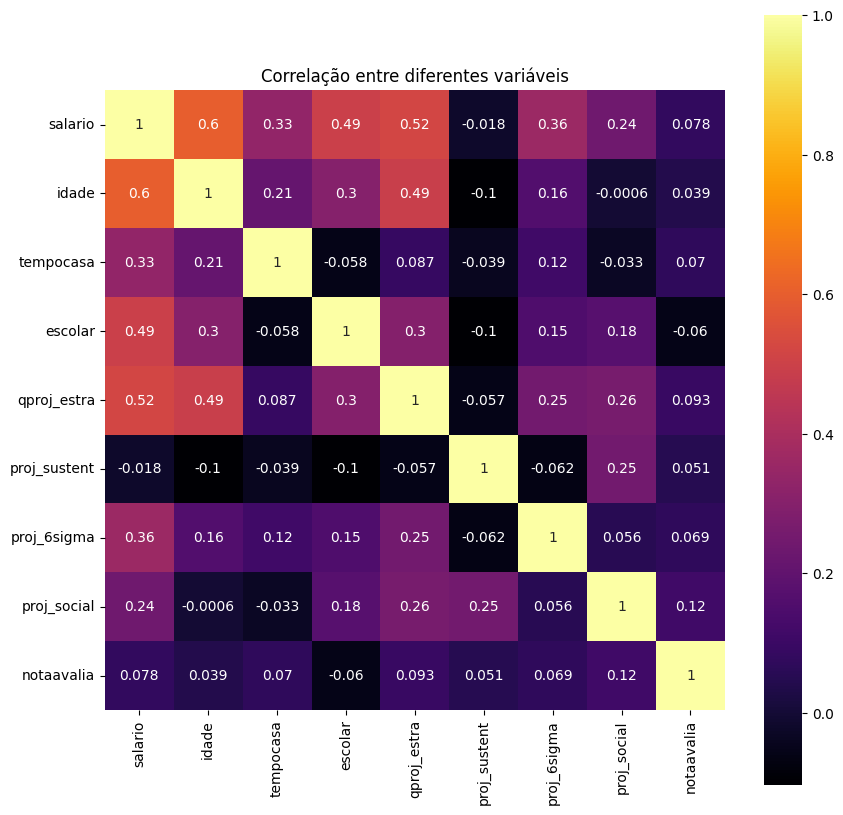

In [1031]:
correlation = salarios.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='inferno')

plt.title('Correlação entre diferentes variáveis')

Podemos observar que há uma correlação moderada entre salarios, idade e quantidade de projetos em atuação.

Text(0.5, 1.0, ' Scatter plot Salarios vs Idade')

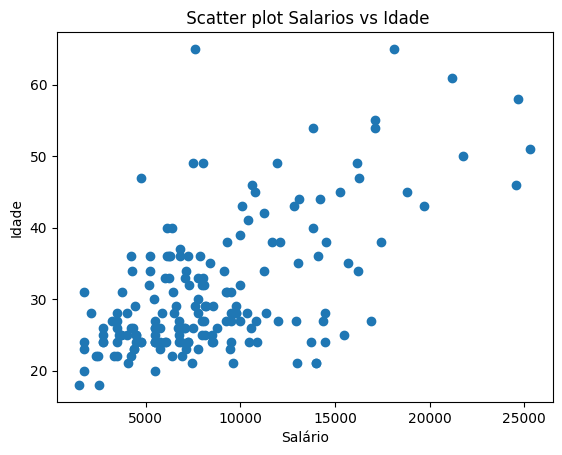

In [1032]:
# Gráfico de dispersão ou scatterplot
plt.scatter('salario', 'idade', data=salarios)
plt.xlabel("Salário")
plt.ylabel("Idade")
plt.title(" Scatter plot Salarios vs Idade")

Text(0.5, 1.0, ' Scatter plot Salarios vs Quantidade de projetos')

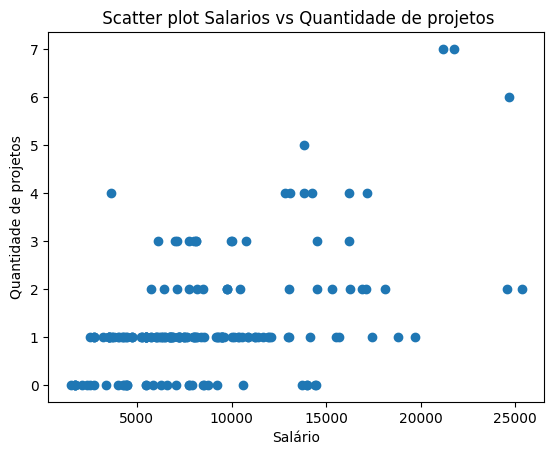

In [1033]:
# Gráfico de dispersão ou scatterplot
plt.scatter('salario', 'qproj_estra', data=salarios)
plt.xlabel("Salário")
plt.ylabel("Quantidade de projetos")
plt.title(" Scatter plot Salarios vs Quantidade de projetos")

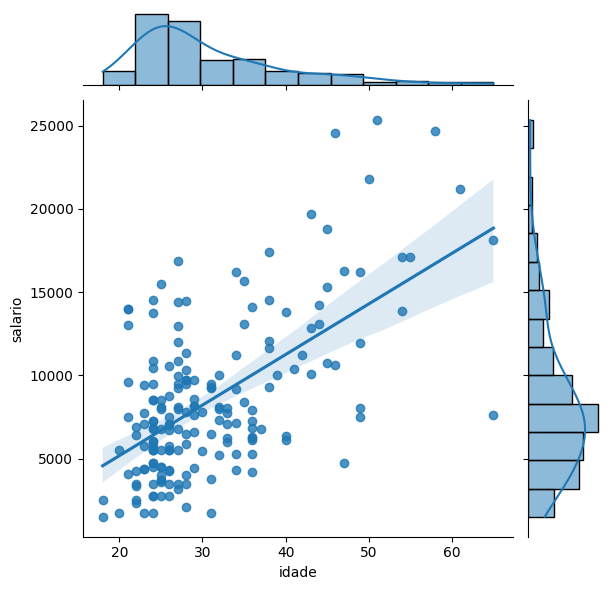

In [1034]:
# Gráfico de dispersão 
sb.jointplot(x='idade', y='salario', data=salarios, kind='reg')

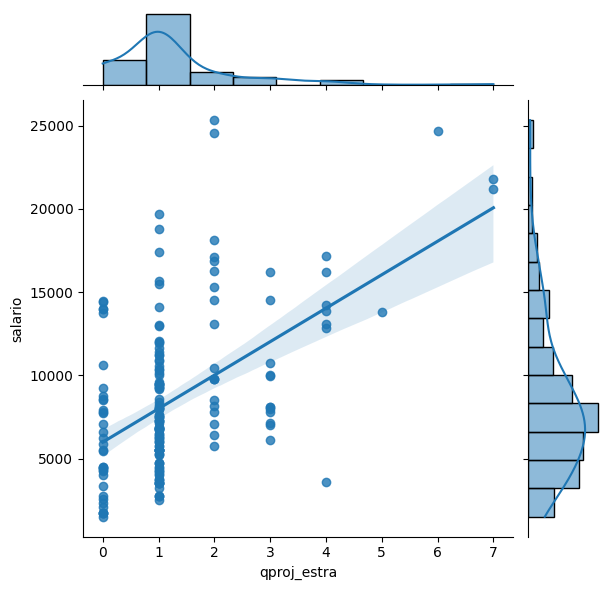

In [1035]:
# Gráfico de dispersão 
sb.jointplot(x='qproj_estra', y='salario', data=salarios, kind='reg')

Text(0.5, 4.585069444444395, 'Quantidade de Projetos')

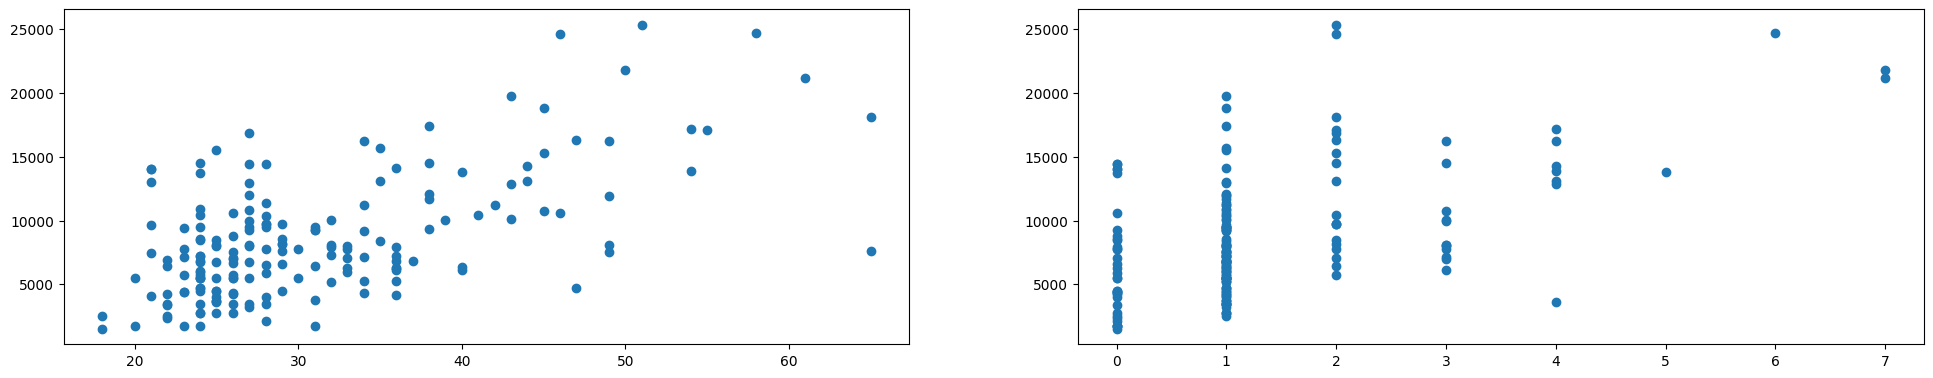

In [1036]:
# Variáveis Preditoras/Independentes quantitativas com a variável Target


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)

plt.scatter(salarios.idade, salarios.salario, marker='o');
fig.set_title('Analise')
fig.set_ylabel('Salario')
fig.set_xlabel('Idade')

plt.subplot(4, 2, 2)

plt.scatter(salarios.qproj_estra, salarios.salario, marker='o');
fig.set_title('Analise')
fig.set_ylabel('Salario')
fig.set_xlabel('Quantidade de Projetos')

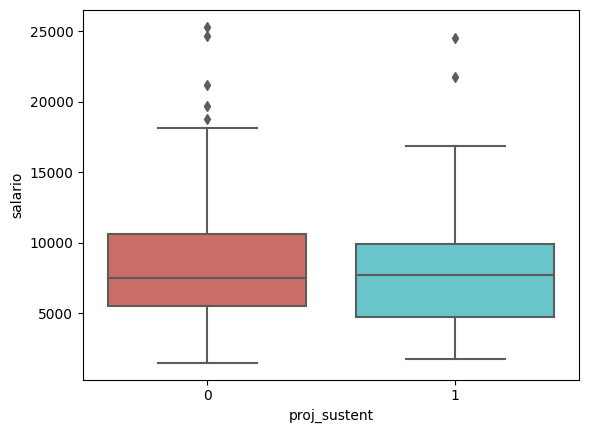

In [1037]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Salario versus a variável Projeto Sustentabilidade
sb.boxplot(x='proj_sustent', y='salario', data=salarios, palette='hls');

Não há indicação de que a participação no projeto de sustentabilidade gere uma diferença salarial.</br>
Temos uma mediana muito próxima nas duas situações participando ou não desse projeto.</br>
E um volume maior de salários entre primeiro e segundo quartil para quem participa desse projeto.</br>
Enquanto quem não participa, aparentemente tem maiores médias salariais.</br>


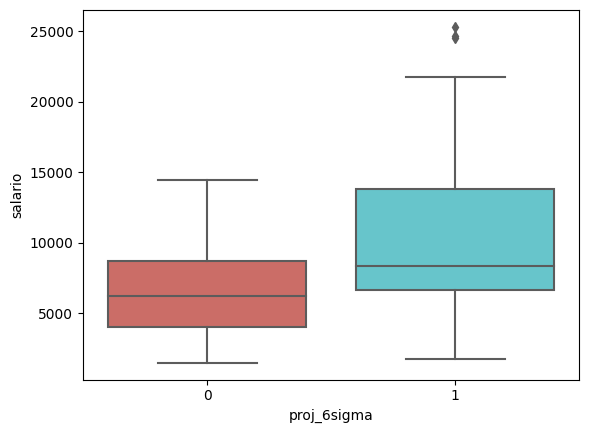

In [1038]:
# Variáveis qualitativa com a variável Target
	# proj_6sigma	proj_social

# Boxplot da variável Salario versus a variável Projeto 6 Sigma
sb.boxplot(x='proj_6sigma', y='salario', data=salarios, palette='hls');

Aqui há indicação de que quem participa desse projeto tem médias salariais mais elevadas.</br>
Chama a atenção a posição das medianas e quando observamos o intervalo entre o segundo e terceiro quartis.

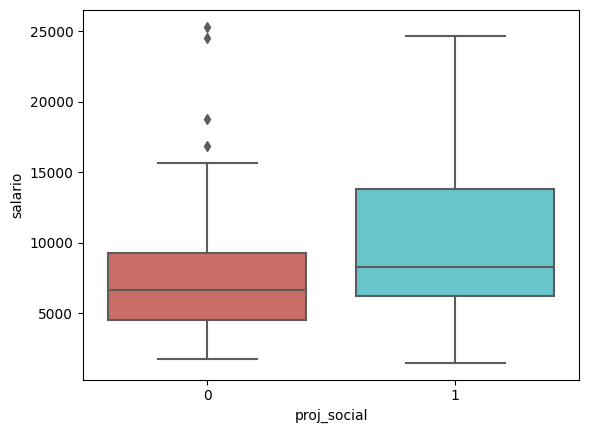

In [1039]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Salario versus a variável Projeto Social
sb.boxplot(x='proj_social', y='salario', data=salarios, palette='hls');

Aqui também há indicativos de que colaboradores participantes desse projeto tem médias salariais mais elevadas.</br>
A posição das medianas e os intervalos entre o segundo e terceiro quartis ajudam nessa análise.

In [1040]:
# Teste do qui-quadrado
Q1 =  np.percentile(salarios['salario'], 25)
Q2 =  np.percentile(salarios['salario'], 50)
Q3 =  np.percentile(salarios['salario'], 75)
maximo = max(salarios['salario'])    
print(Q1, Q2, Q3, maximo)

5491.2300000000005 7551.125 10584.685 25329.91


In [1041]:
salarios.loc[(salarios.salario >= 0) & (salarios.salario <= Q1), 'fx_salarial']=1.0
salarios.loc[(salarios.salario > Q1) & (salarios.salario <= Q2), 'fx_salarial']=2.0
salarios.loc[(salarios.salario > Q2) & (salarios.salario <=Q3), 'fx_salarial']=3.0
salarios.loc[(salarios.salario > Q3) & (salarios.salario <= maximo), 'fx_salarial']=4.0

In [1042]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salario       180 non-null    float64
 1   idade         180 non-null    int64  
 2   tempocasa     180 non-null    int64  
 3   escolar       180 non-null    int64  
 4   qproj_estra   180 non-null    int64  
 5   proj_sustent  180 non-null    int64  
 6   proj_6sigma   180 non-null    int64  
 7   proj_social   180 non-null    int64  
 8   notaavalia    180 non-null    float64
 9   fx_salarial   180 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 14.2 KB


In [1043]:
salarios.head()

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia,fx_salarial
0,8000.80,25,4,11,1,1,1,0,79.38,3.0
1,8500.17,24,5,11,0,0,1,0,84.13,3.0
2,3350.59,22,1,12,0,0,0,0,46.15,1.0
3,9500.24,28,4,14,1,0,0,1,83.85,3.0
4,1500.63,18,2,12,0,0,0,1,73.64,1.0


In [1044]:
# crosstab tabela cruzada entre faixa salarial e projeto 6 sigma

pd.crosstab(salarios.fx_salarial,salarios.proj_6sigma, margins=True)

proj_6sigma,0,1,All
fx_salarial,,,
1.0,31,14,45
2.0,23,22,45
3.0,16,29,45
4.0,11,34,45
All,81,99,180


In [1045]:
# participantes do 6 sigma
(salarios.proj_6sigma.value_counts() / salarios.shape[0]) * 100


1    55.0
0    45.0
Name: proj_6sigma, dtype: float64

55% dos colaboradores participam desse projeto

In [1046]:
# crosstab tabela cruzada entre faixa salarial e projeto sustentabilidade

pd.crosstab(salarios.fx_salarial,salarios.proj_sustent, margins=True)

proj_sustent,0,1,All
fx_salarial,,,
1.0,32,13,45
2.0,34,11,45
3.0,31,14,45
4.0,33,12,45
All,130,50,180


In [1047]:
# participantes do sustentabilidade
(salarios.proj_sustent.value_counts() / salarios.shape[0]) * 100

0    72.222222
1    27.777778
Name: proj_sustent, dtype: float64

Aproximadamente somente 28% dos colaboradores desses projetos

In [1048]:
# crosstab tabela cruzada entre faixa salarial e projeto social

pd.crosstab(salarios.fx_salarial,salarios.proj_social, margins=True)

proj_social,0,1,All
fx_salarial,,,
1.0,29,16,45
2.0,26,19,45
3.0,22,23,45
4.0,13,32,45
All,90,90,180


In [1049]:
# participantes do sustentabilidade
(salarios.proj_social.value_counts() / salarios.shape[0]) * 100

0    50.0
1    50.0
Name: proj_social, dtype: float64

50% dos colaboradores participam dos projetos sociais

Analisadas as variáveis categóricas, faz sentido continuar a análise com a 6 sigma e projeto social.</br>
Pois aparentemente são características que tem influencia na média salarial


In [1050]:
table = pd.crosstab(salarios.fx_salarial,salarios.proj_6sigma)
table


proj_6sigma,0,1
fx_salarial,,
1.0,31,14
2.0,23,22
3.0,16,29
4.0,11,34


In [1051]:
table_soc = pd.crosstab(salarios.fx_salarial,salarios.proj_social, margins=True)
table_soc

proj_social,0,1,All
fx_salarial,,,
1.0,29,16,45
2.0,26,19,45
3.0,22,23,45
4.0,13,32,45
All,90,90,180


In [1052]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [1053]:
stat, p, dof, expected = chi2_contingency(table)
p

0.0001429985968152404

In [1054]:
print(f"{'*'*20} Graus de Liberdade {'*'*20}")
print(f"Graus de liberdade: dof={dof}")

print()

print("Tabela Esperada:")
print(expected)

# interpret test-statistic
print(f"{'*'*15} Interpretação Testes Estatísticos {'*'*15}")
prob = 0.95
critical = chi2.ppf(prob, dof)

print(f"Probability={prob}\nCritical={critical}\nStat={stat}")

if abs(stat) >= critical:
	print("Dependent (reject H0)")
else:
	print("Independent (fail to reject H0)")

# interpret p-value
print(f"{'*'*20} Interpretação do p-value {'*'*20}")
alpha = 1.0 - prob
print(f"significance={alpha}\np={p}")

if p <= alpha:
	print("Dependent (reject H0)")
else:
	print("Independent (fail to reject H0)")

******************** Graus de Liberdade ********************
Graus de liberdade: dof=3

Tabela Esperada:
[[20.25 24.75]
 [20.25 24.75]
 [20.25 24.75]
 [20.25 24.75]]
*************** Interpretação Testes Estatísticos ***************
Probability=0.95
Critical=7.814727903251179
Stat=20.359147025813694
Dependent (reject H0)
******************** Interpretação do p-value ********************
significance=0.050000000000000044
p=0.0001429985968152404
Dependent (reject H0)


Hipótese nula H0, rejeitada. Significa que há relação entre salário e o projeto 6 sigma

In [1055]:
stat_soc, p_soc, dof_soc, expected_soc = chi2_contingency(table_soc)
p_soc

0.11573020540362876

In [1056]:
print(f"{'*'*20} Graus de Liberdade {'*'*20}")
print(f"Graus de liberdade: dof={dof_soc}")

print()

print("Tabela Esperada:")
print(expected_soc)

# interpret test-statistic
print(f"{'*'*15} Interpretação Testes Estatísticos {'*'*15}")
prob = 0.95
critical_soc = chi2.ppf(prob, dof_soc)

print(f"Probability={prob}\nCritical={critical_soc}\nStat={stat_soc}")

if abs(stat_soc) >= critical_soc:
	print("Dependent (reject H0)")
else:
	print("Independent (fail to reject H0)")

# interpret p-value
print(f"{'*'*20} Interpretação do p-value {'*'*20}")
alpha = 1.0 - prob
print(f"significance={alpha}\np={p_soc}")

if p_soc <= alpha:
	print("Dependent (reject H0)")
else:
	print("Independent (fail to reject H0)")

******************** Graus de Liberdade ********************
Graus de liberdade: dof=8

Tabela Esperada:
[[ 22.5  22.5  45. ]
 [ 22.5  22.5  45. ]
 [ 22.5  22.5  45. ]
 [ 22.5  22.5  45. ]
 [ 90.   90.  180. ]]
*************** Interpretação Testes Estatísticos ***************
Probability=0.95
Critical=15.50731305586545
Stat=12.888888888888888
Independent (fail to reject H0)
******************** Interpretação do p-value ********************
significance=0.050000000000000044
p=0.11573020540362876
Independent (fail to reject H0)


In [1057]:
# Regressão linear múltipla
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats


In [1058]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salario       180 non-null    float64
 1   idade         180 non-null    int64  
 2   tempocasa     180 non-null    int64  
 3   escolar       180 non-null    int64  
 4   qproj_estra   180 non-null    int64  
 5   proj_sustent  180 non-null    int64  
 6   proj_6sigma   180 non-null    int64  
 7   proj_social   180 non-null    int64  
 8   notaavalia    180 non-null    float64
 9   fx_salarial   180 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 14.2 KB


In [1059]:
X = salarios.iloc[:, 1:9]

y = salarios[['salario']]


In [1060]:
y.tail()

,salario
175,7896.70
176,10575.13
177,6309.66
178,2100.68
179,4059.13


In [1061]:
# Separar teste e treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 105)

In [1062]:
# Regressão utilizando o método dos mínimos quadrados
X_ = sm.add_constant(X_train)

model = sm.OLS(y_train, X_).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     32.22
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           7.26e-30
Time:                        01:01:48   Log-Likelihood:                -1601.3
No. Observations:                 171   AIC:                             3221.
Df Residuals:                     162   BIC:                             3249.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8372.5906   1663.136     -5.034   

In [1063]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salario       180 non-null    float64
 1   idade         180 non-null    int64  
 2   tempocasa     180 non-null    int64  
 3   escolar       180 non-null    int64  
 4   qproj_estra   180 non-null    int64  
 5   proj_sustent  180 non-null    int64  
 6   proj_6sigma   180 non-null    int64  
 7   proj_social   180 non-null    int64  
 8   notaavalia    180 non-null    float64
 9   fx_salarial   180 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 14.2 KB


In [1064]:
# Secionando as variáveis significantes:
# Consideramos idade, tempo de casa, escolaridade, quantidade de projetos e projeto 6 sigma.
# Adicionamos tempo de casa e escolaridade para não gerar um overfitting
X = salarios.iloc[:, [1, 2, 3, 4, 6]]
y = salarios[['salario']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 13)

In [1065]:
# Gera um novo modelo
X_ = sm.add_constant(X_train)

modelo = sm.OLS(y_train, X_).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     52.31
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           2.60e-32
Time:                        01:01:49   Log-Likelihood:                -1609.2
No. Observations:                 171   AIC:                             3230.
Df Residuals:                     165   BIC:                             3249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8295.1637   1342.216     -6.180      

In [1066]:
# Comparar modelos
# Calculando o valor predito da variável resposta na amostra treino  
y_train_pred = modelo.predict(X_)
y_train_pred

115     9219.640563
100     7591.933478
130     9743.426199
10      3365.803306
44      6662.985275
           ...     
98      7923.918112
16      3888.347477
74     12436.598300
176    10276.818711
82      9516.024467
Length: 171, dtype: float64

In [1067]:
# Medidas de erro na amostra treino
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

me1   = round((y_train-y_train_pred).mean(),2)

mae1  = mean_absolute_error(y_train, y_train_pred).round(2)

mse1  = (mean_squared_error(y_train, y_train_pred)).round(2)

rmse1  = (np.sqrt(mean_squared_error(y_train, y_train_pred))).round(2)

mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)

# mape1  =  round(np.sqrt((mae1/y_train).mean(),2) 
mape1 = mean_absolute_percentage_error(y_train, y_train_pred)

#print(f"Mean Error: {me1}")
print(f"Mean Absolute Error: {mae1}")
print(f"Mean Squared Error: {mse1}")
print(f"Root Mean Squared Error:: {rmse1}")
#print(f"Mean Percentage Error: {mpe1}")
print(f"Mean Absolute Percentage Error: {mape1}")

Mean Absolute Error: 2309.7
Mean Squared Error: 8739987.84
Root Mean Squared Error:: 2956.35
Mean Absolute Percentage Error: 0.346827575207669


In [1068]:
acertos = 1 -mape1
print(f"Acerto: {(acertos * 100).round(2)}%")

Acerto: 65.32%


In [1069]:
# Decision Tree

# X_train
# X_test
# y_train
# y_test
X_train.shape, X_test.shape

((171, 5), (9, 5))

In [1070]:
y_test.head()

,salario
174,5464.26
172,13827.91
23,6500.71
111,14131.27
77,6850.42


In [1071]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 115 to 82
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   idade        171 non-null    int64
 1   tempocasa    171 non-null    int64
 2   escolar      171 non-null    int64
 3   qproj_estra  171 non-null    int64
 4   proj_6sigma  171 non-null    int64
dtypes: int64(5)
memory usage: 12.1 KB


In [1072]:
# Criando modelo 
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.tree import plot_tree


Classif_tree = DecisionTreeClassifier()

In [1073]:
salarios

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia,fx_salarial
0,8000.80,25,4,11,1,1,1,0,79.38,3.0
1,8500.17,24,5,11,0,0,1,0,84.13,3.0
2,3350.59,22,1,12,0,0,0,0,46.15,1.0
3,9500.24,28,4,14,1,0,0,1,83.85,3.0
4,1500.63,18,2,12,0,0,0,1,73.64,1.0
...,...,...,...,...,...,...,...,...,...,...
175,7896.70,36,14,13,0,1,1,1,88.87,3.0
176,10575.13,26,15,14,1,0,1,1,85.45,3.0
177,6309.66,36,3,14,1,0,0,1,76.72,2.0
178,2100.68,28,11,12,0,1,0,1,76.22,1.0


In [1074]:
# treinar o modelo
# Pra usar o Decision tree temos que usar como target as faixas de salario

X = salarios.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]
y = salarios[['fx_salarial']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 13)


In [1075]:
classif = Classif_tree.fit(X_train, y_train)

In [1076]:
# Verificando as features mais importantes para o modelo treinado:
classif.feature_importances_


array([0.32730992, 0.22504344, 0.16632367, 0.03671913, 0.03761765,
       0.01235411, 0.04010981, 0.15452226])

In [1077]:
for feature,importancia in zip(X_train.columns,classif.feature_importances_):
    print(f"feature: {feature:12} / importancia:{importancia}")

feature: idade        / importancia:0.3273099214494335
feature: tempocasa    / importancia:0.22504344194390302
feature: escolar      / importancia:0.16632366770589954
feature: qproj_estra  / importancia:0.03671913498568568
feature: proj_sustent / importancia:0.037617646479308015
feature: proj_6sigma  / importancia:0.012354111797815542
feature: proj_social  / importancia:0.04010981432709171
feature: notaavalia   / importancia:0.15452226131086322


In [1078]:
# Testando o modelo
y_pred_all = classif.predict(X_test)

In [1079]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, y_pred_all)
confusion_matrix

array([[1, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 2]])

In [1080]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_all, zero_division=True))

# Resultado do classification_report:

              precision    recall  f1-score   support

         1.0       0.50      0.50      0.50         2
         2.0       1.00      0.25      0.40         4
         3.0       0.00      1.00      0.00         0
         4.0       0.67      0.67      0.67         3

    accuracy                           0.44         9
   macro avg       0.54      0.60      0.39         9
weighted avg       0.78      0.44      0.51         9



In [1081]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [1082]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

array([0.39273567, 0.24882802, 0.12350973, 0.04881548, 0.02955251,
       0.00799918, 0.03271242, 0.115847  ])

In [1083]:
for feature,importancia in zip(X_train.columns,clf.feature_importances_):
    print(f"feature: {feature:12} / importancia: {importancia}")

feature: idade        / importancia: 0.39273566912705077
feature: tempocasa    / importancia: 0.2488280167032098
feature: escolar      / importancia: 0.12350973450905274
feature: qproj_estra  / importancia: 0.048815478842081164
feature: proj_sustent / importancia: 0.029552508024495237
feature: proj_6sigma  / importancia: 0.007999175104374657
feature: proj_social  / importancia: 0.03271241608473213
feature: notaavalia   / importancia: 0.11584700160500339


In [1084]:
# Testando o modelo
y_pred = clf.predict(X_test)

In [1085]:
y_pred

array([3., 4., 4., 4., 2., 4., 1., 1., 3.])

In [1086]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1, 0, 1, 0],
       [1, 1, 0, 2],
       [0, 0, 0, 0],
       [0, 0, 1, 2]])

In [1087]:
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

         1.0       0.50      0.50      0.50         2
         2.0       1.00      0.25      0.40         4
         3.0       0.00      1.00      0.00         0
         4.0       0.50      0.67      0.57         3

    accuracy                           0.44         9
   macro avg       0.50      0.60      0.37         9
weighted avg       0.72      0.44      0.48         9



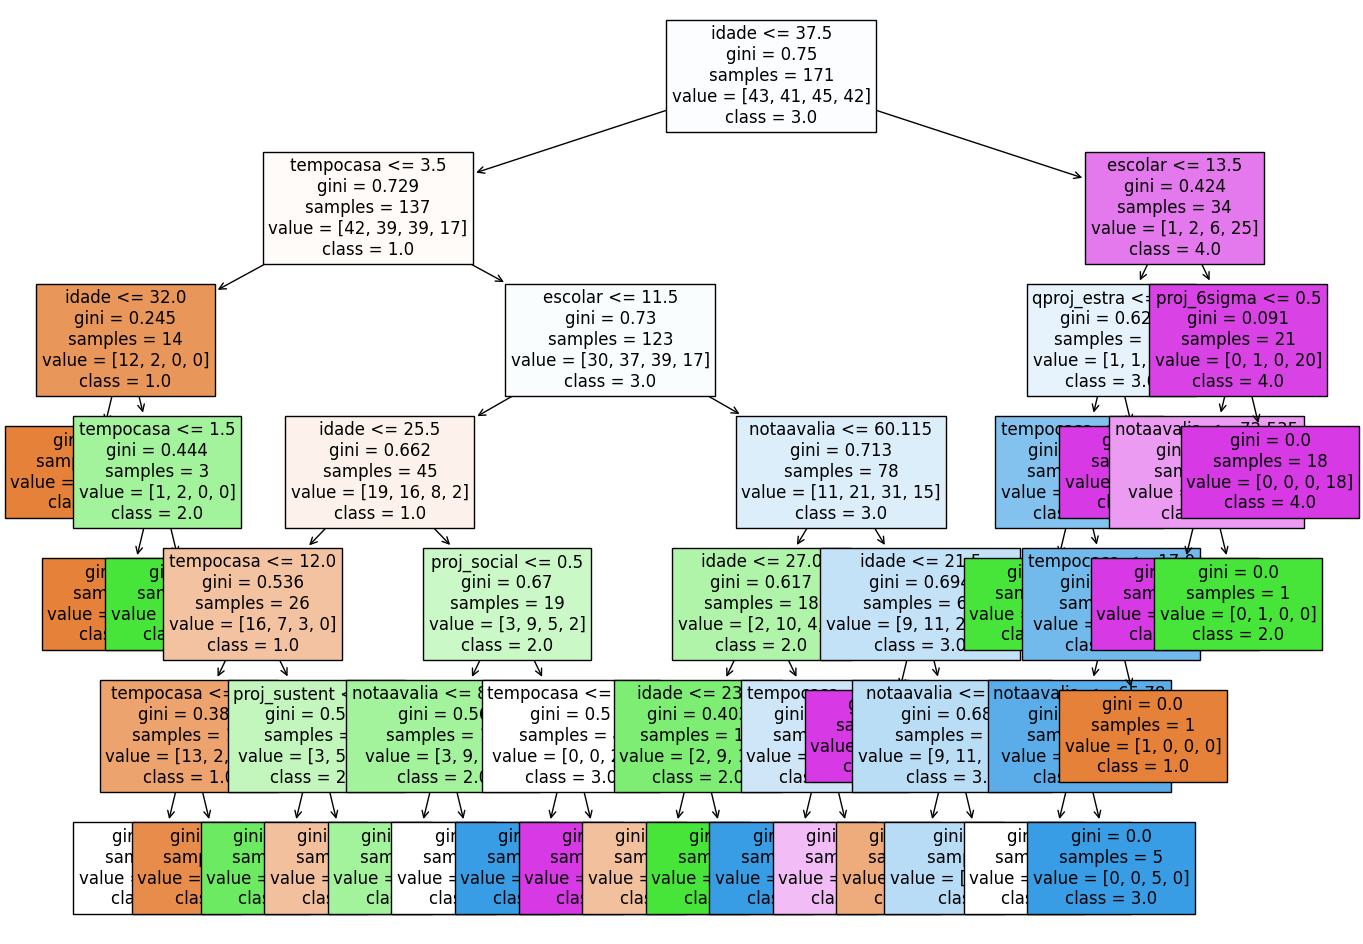

In [1088]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(clf, feature_names=X_train.columns, fontsize=12,
filled=True,
class_names=["1.0", "2.0", "3.0", "4.0"])
#5491.2300000000005 7551.125 10584.685 25329.91

In [1089]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1, 0, 1, 0],
       [1, 1, 0, 2],
       [0, 0, 0, 0],
       [0, 0, 1, 2]])

In [1090]:
print(classification_report(y_test, y_pred, zero_division=True))

              precision    recall  f1-score   support

         1.0       0.50      0.50      0.50         2
         2.0       1.00      0.25      0.40         4
         3.0       0.00      1.00      0.00         0
         4.0       0.50      0.67      0.57         3

    accuracy                           0.44         9
   macro avg       0.50      0.60      0.37         9
weighted avg       0.72      0.44      0.48         9



Ficamos aqui com uma acurácia de 22%, Logo o modelo de Regressão linear nos deu um melhor previsão.</br>
Ainda assim, ficou com um valor baixo de percentualde acertos.</br>
Talvez seja necessário rever a decisão de não normalizar os dados para ter uma maior acertividade.</br>
